# Kalman filter to solve solving a Linear Dynamical System

The content of this notebook is based in Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.

## A. Introduction

A state space model or SSM is just like an HMM, except the hidden states are continuous. The model can be written in the following generic form:

\begin{align}
z_{t} = g(u_{t}, z_{t-1}, \epsilon_{t})\\
y_{t} = h(z_{t}, u_{t}, \delta_{t})
\end{align}

where $z_{t}$ is the hidden state, $u_{t}$ is an optional input or control signal, $y_{t}$ is the observation, $g$ is the transition model, $h$ is the observation model, $e_{t}$ is the system noise at time $t$, and $\delta_{t}$ is the observation noise at time $t$.

The primary goals in using SSMs is to recursively estimate the belief state, $p(z_{t}|y_{1:t}, u_{1:t}, \theta)$, where $\theta$ are the parameters of the model and is known (Note: we will drop the conditioning on $u$ and  $\theta$ for brevity).

An important special case of an SSM is where all the CPDs are linear-Gaussians. In other words, we assume:

- The transition model is a linear funtion

    \begin{align}
    z_{t} = A_{t}z_{t-1}+B_{t}u_{t}+\epsilon_{t}
    \end{align}

- The observation model is a linear function

    \begin{align}
    y_{t} = C_{t}z_{t}+D_{t}u_{t}+\delta_{t}
    \end{align}

- The system noise is Gaussian

    \begin{align}
    e_{t} \sim \mathcal{N}(0, Q_{t})
    \end{align}

- The observation noise is Gausian

    \begin{align}
    \delta_{t} \sim \mathcal{N}(0, R_{t})
    \end{align}
    

This model is called a linear-Gaussian SSM (LG-SSM) or a linear dynamical system (LDS). If the parameters $\delta_{t} = (A_{t}, B_{t}, C_{t}, D_{t}, Q_{t}, R_{t})$ are independent of time, the model is called stationary.

In particular, if the initial belief stat is Gaussian, $p(z_{1}) = \mathcal{N}(\mu_{1|0}, \Sigma_{1|0})$, then all subsequent belief states will also be Gaussian; we will denote them by $p(z_{t}|y_{1:t})=\mathcal{N}(\mu_{t|t}, \Sigma_{t|t})$, the notation $\mu_{t|\tau}$ denotes $\mathbb{E}[z_{t}|y_{1:\tau}]$, similarly $\Sigma_{t|\tau}$ denote $cov[z_{t}|y_{1:\tau}]$; thus $\mu_{t|0}$ denotes the prior for $z_{1}$ before we have seen any data. For brevity we will denote the posterior belief states using $\mu_{t|t}=\mu_{t}$ and $\Sigma_{t|t} = \Sigma_{t}$.

## B. The Kalman filtering algorithm

The Kalman filter is an algorithm for exact Bayesian filtering for LG-SSM. We will represent the marginal posterior at time $t$ by

\begin{align}
p(z_{t}|y_{1:t}, u_{1:t}) = \mathcal{N}(z_{t}|\mu_{t}, \Sigma_{t})
\end{align}

Since everything is Gaussian, we can perform the prediction and update steps in closed form.

### B.1. Prediction step

The prediction step is:

\begin{align}
p(z_{t}|y_{1:t-1}, u_{1:t}) &= \int\mathcal{N}(z_{t}|A_{t}z_{t-1}+B_{t}u_{t}, Q_{t})\mathcal{N}(z_{t-1}|\mu_{t-1}, \Sigma_{t-1})d z_{t-1}\\
& = \mathcal{N}(z_{t}|\mu_{t|t-1}, \Sigma_{t|t-1})\\
\mu_{t,t-1} & \triangleq A_{t}\mu_{t-1}+B_{t}u_{t}\\
\Sigma_{t,t-1} & \triangleq A_{t}\Sigma_{t-1}A_{t}^{T}+Q_{t}
\end{align}

### B.2. Measurement step
The measurement step can be computed using Bayes rule, as follows

\begin{align}
p(z_{t}|y_{1:t}, u_{1:t})  \propto p(y_{t}|z_{t}, u_{t})p(z_{t}|y_{1:t-1}, u_{1:t})
\end{align}

it can be shown that

\begin{align}
p(z_{t}|y_{1:t}, u_{t}) & = \mathcal{N}(z_{t}|\mu_{t}, \Sigma_{t}) \\
\mu_{t} & = \mu_{t|t-1}+K_{t}r_{t}\\
\Sigma_{t} & = (I-K_{t}C_{t})\Sigma_{t|t-1} 
\end{align}

where $r_{t}$ is the residual or innovation, given by the difference between our predicted observation and the actual observation:

\begin{align}
r_{t} &\triangleq y_{t}-\hat{y}_{t}\\
\hat{y}_{t} &\triangleq \mathbb{E}[y_{t}|y_{1:t-1}, u_{1:t}] = C_{t}\mu_{t|t-1}+D_{t}u_{t}
\end{align}

and $K_{t}$ is the Kalman gain matrix, giben by

\begin{align}
K_{t}  &\triangleq \Sigma_{t|t-1}C_{t}^{T}S_{t}^{-1}
\end{align}

where

\begin{align}
S_{t}  &\triangleq cov[r_{t}|y_{1:t-1}, u_{1:t}]\\
& = \mathbb{E}[(C_{t}z_{t}+\delta_{t}-\hat{y}_{t})(C_{t}z_{t}+\delta_{t}-\hat{y}_{t})^{T}|y_{1:t-1}, u_{1:t}]\\
& = C_{t}\Sigma_{t|t-1}C_{t}^{T}+R_{t}
\end{align}

## C. Aplication

One of the earliest applications of Kalman filtering was for tracking objects, such as airplanes and missiles, from noisy measurements, such as radar. Consider an object moving in a 2D plane. Let $z_{1t}$ and $z_{2t}$ be the horizontal and vertical locations of the object, and $\dot{z_{1t}}$ and $\dot{z_{2t}}$ be the corresponding velocity. We can represent this as a state vector $z_{t} \in \mathbb{R}^{4}$ as follows:

\begin{align}
z_{t}^{T} = (z_{1t} \; z_{2t} \; \dot{z_{1t}} \; \dot{z_{2t}})
\end{align}

Let us assume that the object is moving at constant velocity, but is "perturbed" by random Gaussian noise (e.g., due to the wind). Thus we can model the system dynamics as follows:

\begin{align}
z_{t} = A_{t}z_{t-1}+\epsilon_{t}
\end{align}

\begin{align}
\begin{pmatrix}
    z_{1t} \\
    z_{2t}\\
    \dot{z}_{1t}\\
    \dot{z}_{1t}\\
\end{pmatrix}
=
\begin{pmatrix}
    1 & 0 & \Delta & 0  \\
    0 & 1 & 0 & \Delta  \\
    0 & 0 & 1 & 0  \\
    0 & 0 & 0 & 1  \\
\end{pmatrix}
\begin{pmatrix}
    z_{1,t-1} \\
    z_{2,t-1}\\
    \dot{z}_{1,t-1}\\
    \dot{z}_{2,t-1}\\
\end{pmatrix}
+\begin{pmatrix}
    \epsilon_{1t} \\
    \epsilon_{2t}\\
    \epsilon_{3t}\\
    \epsilon_{4t}\\
\end{pmatrix}
\end{align}


where $e_{t}\sim \mathcal{N}(0, Q)$ is the system noise, and $\delta$ is the sampling period. This says that the new location $z_{j,t}$ is the old location $z_{j,t-1}$ plus $\delta$ times the old velocity $z_{j}, t-1$, plus random noise, $\epsilon_{j},t$ for $j=1:2$. Also, the new velocity $z_{j,t}$ is the old velocity $z_{j},t-1$ plus random noise, $e_{j,t}$ for j=3:4. This is called a random accelerations model, since the object moves according to Newton's laws, but is subject to random changes in velocity.
Now suppose that we can observe the location of the object but not its velocity. Let $y_{t} \in \mathbb{R}^{2}$ represent out observation, wich we assume is subject to Gaussian noise. We can model this as follows:

\begin{align}
y_{t} = C_{t}z_{t}+\delta_{t}
\end{align}


\begin{align}
\begin{pmatrix}
    y_{1t} \\
    y_{2t}\\    
\end{pmatrix}
=
\begin{pmatrix}
    1 & 0 & 0 & 0  \\
    0 & 1 & 0 & 0  \\
\end{pmatrix}
\begin{pmatrix}
    z_{1,t-1} \\
    z_{2,t-1}\\
    \dot{z}_{1,t-1}\\
    \dot{z}_{2,t-1}\\
\end{pmatrix}
+\begin{pmatrix}
    \delta_{1t} \\
    \delta_{2t}\\
\end{pmatrix}
\end{align}

where $\delta_{t}\sim \mathcal{N}(0, R)$ is the measurement noise.


Finally, we will assume that our initial (prior) beliefs about the state of the object is Guassian, $p(z_{1})= \mathcal{N} (z_{1}|\mu_{1|0}, \Sigma_{1|0})$

### C.1 Kalman filter to our example

Relevant definitions
\begin{align}
\mu_{t|t-1} & \triangleq A\mu_{t-1}\\
\Sigma_{t|t-1} & \triangleq A\Sigma_{t-1}A^{T}+Q\\
\hat{y}_{t} &\triangleq C\mu_{t|t-1}\\
r_{t} &\triangleq y_{t}-\hat{y}_{t}\\
S_{t} &\triangleq  C\Sigma_{t|t-1}C^{T}+R\\
K_{t}  &\triangleq \Sigma_{t|t-1}C^{T}S_{t}^{-1}
\end{align}

Update step
\begin{align}
\mu_{t} & = \mu_{t|t-1}+K_{t}r_{t}\\
\Sigma_{t} & = (I-K_{t}C)\Sigma_{t|t-1}
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import inv
from matplotlib.patches import Ellipse

In [2]:
def kalman_filter(A, C, Q, R, mu0, sigma0, y):
    N = len(y)
    sigma = np.zeros((N, sigma0.shape[0],sigma0.shape[0]))
    mu = np.zeros((N, len(mu0)))
    # initial prediction
    old_mu = mu0
    old_sigma = sigma0
    for t in range(N):
        ## measurement step
        S = dot(dot(C, old_sigma), C.T)+R
        K = dot(dot(old_sigma, C.T), inv(S))
        r = y[t]-dot(C, old_mu)
        # update
        mu[t] = old_mu+dot(K, r)
        sigma[t] = dot(np.identity(len(sigma0))-dot(K,C), old_sigma) 
        ## prediction step
        old_mu = dot(A, mu[t])
        old_sigma = dot(dot(A,sigma[t]), A.T)+Q
    return mu, sigma

In [3]:
# generate observed data
np.random.seed(1)
y1 = 10*np.linspace(10, 24, 30)
y2 = 10*np.linspace(10, 12, 30)
y_true = np.vstack([y1,y2]).T
y_obs = y_true+np.random.multivariate_normal(mean = np.array([0,0]), cov =  np.array([[10, 0], [0, 50]]), size=len(y_true))

In [4]:
# parameters
delta = 1
A = np.array([[1, 0, delta, 0],  [0, 1, 0, delta], [0, 0, 1, 0], [0, 0, 0, 1]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
Q = np.array([[5, 0, 0, 0], [0, 5, 0, 0], [0, 0, 0.1, 0], [0, 0, 0, 0.1]])
R = np.array([[50, 0], [0, 50]])
mu0 = np.array([100, 100, 5, 0.5])
sigma0 = np.array([[1000, 0, 0, 0], [0, 1000, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]) 

In [5]:
# inference
mu, sigma = kalman_filter(A, C, Q, R, mu0, sigma0, y_obs)

In [6]:
def get_ellipse(mu, cov):
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ellipse = Ellipse(xy=tuple(mu),
              width=lambda_[0]*2, height=lambda_[1]*2,
              angle=np.rad2deg(np.arccos(v[0, 0])),  color='blue')

    return ellipse

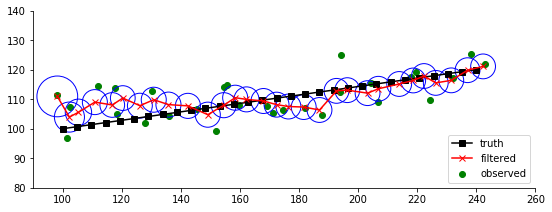

In [24]:
plt.figure(figsize=(9,9))
ax = plt.subplot(111, aspect='equal')
ax.scatter(y_obs[:,0], y_obs[:,1], color="green", label="observed")
ax.plot(y_true[:,0], y_true[:,1], color="black",  marker="s", label="truth")
ax.plot(mu[:,0], mu[:,1], color="red", marker="x", label="filtered")
ax.set_xlim(90, 260)
ax.set_ylim(80, 140)
ellipses = []
for i in range(len(y_obs)):
    ellipse = get_ellipse(mu[i][0:2], sigma[i][0:2,0:2])
   
    ax.add_artist(ellipse)
    ellipse.set_facecolor('none')
    
plt.legend(loc=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Our "best guess" about the location of the object is the posterior mean, denoted as a red cross in the above figure. Our uncertainty associated with this is represented as an ellipse, which contains 95\% of the probability mass. We see that out uncertainty fall down over time, as the effects of the initial uncertainty. We also see that the estimated trajectory has ``filtered out" some of the noise.